In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [5]:
DATA_ROOT = './data/arrhythmia'
DATA_CSV = DATA_ROOT + '/arrhythmia.data'

In [45]:
#The ? are missing values, which are replaced with na when we load in the file
data = pd.read_csv(DATA_CSV, header=None, na_values='?')

In [7]:
data.info

<bound method DataFrame.info of      0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275 

In [8]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


The dataset doesn't seem to have labels for the columns. However, the authors did provide us with a key in the file arrhythmias.names so we can refer to that as needed.

In [9]:
data_len = len(data)

for col in data.columns:
    nan_count = data[col].isnull().sum()
    print('Number of NaN in column {}:\t{}\t({:.2f}%)'.format(col, nan_count, nan_count/data_len*100))

Number of NaN in column 0:	0	(0.00%)
Number of NaN in column 1:	0	(0.00%)
Number of NaN in column 2:	0	(0.00%)
Number of NaN in column 3:	0	(0.00%)
Number of NaN in column 4:	0	(0.00%)
Number of NaN in column 5:	0	(0.00%)
Number of NaN in column 6:	0	(0.00%)
Number of NaN in column 7:	0	(0.00%)
Number of NaN in column 8:	0	(0.00%)
Number of NaN in column 9:	0	(0.00%)
Number of NaN in column 10:	8	(1.77%)
Number of NaN in column 11:	22	(4.87%)
Number of NaN in column 12:	1	(0.22%)
Number of NaN in column 13:	376	(83.19%)
Number of NaN in column 14:	1	(0.22%)
Number of NaN in column 15:	0	(0.00%)
Number of NaN in column 16:	0	(0.00%)
Number of NaN in column 17:	0	(0.00%)
Number of NaN in column 18:	0	(0.00%)
Number of NaN in column 19:	0	(0.00%)
Number of NaN in column 20:	0	(0.00%)
Number of NaN in column 21:	0	(0.00%)
Number of NaN in column 22:	0	(0.00%)
Number of NaN in column 23:	0	(0.00%)
Number of NaN in column 24:	0	(0.00%)
Number of NaN in column 25:	0	(0.00%)
Number of NaN in c

Columns 11, 12, 13, 14, and 15 (Python zero indexes) are the only ones with NaN values. Normally, I'd recommend imputing values using one of several methods, but for column 14 it would be rather tricky to properly impute values when only 16.81% of the values are present. As such, I'll just drop the column for now. The columns above are T, P, QRST, J, and Heart Rate, respectively. With a little research we know that columns 11-14 are the vector angles with associated waves seen on a electrocardiogram.

## Impution and Interpolation: A Quick Analysis
As a demonstration of the effects of the more common methods of imputation and plot the data. You wouldn't normally impute values when such a small number of values are present in the dataset, but this will nicely over-emphasize the effects that different imputation methods have on the distributions.

In [10]:
col_13 = data[13]
print("Mean: ", col_13.mean())
print("Median: ", col_13.median())
print("Std Dev: ", col_13.std())

Mean:  -13.592105263157896
Median:  -50.5
Std Dev:  127.22024761612741


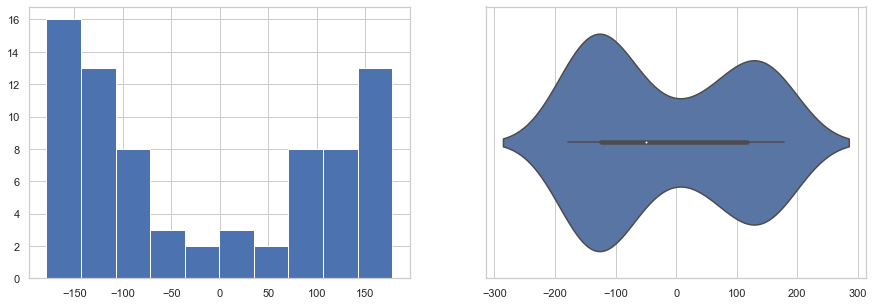

In [11]:
sns.set(style="whitegrid")

f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13.hist()

plt.subplot(1, 2, 2)
values = col_13.values
ax = sns.violinplot(x=values)

First we will examine the Back Fill and Forward Fill options native to pandas DataFrames. These work by either using the previous non-NaN value in the column as the value that all the following NaN's are replaced with or the next non-NaN value to replace all previous NaN's.

In [12]:
col_13_bf = col_13.fillna(method='bfill')
print("Mean: ", col_13_bf.mean())
print("Median: ", col_13_bf.median())
print("Std Dev: ", col_13_bf.std())

Mean:  3.940133037694013
Median:  -18.0
Std Dev:  124.95323021561144


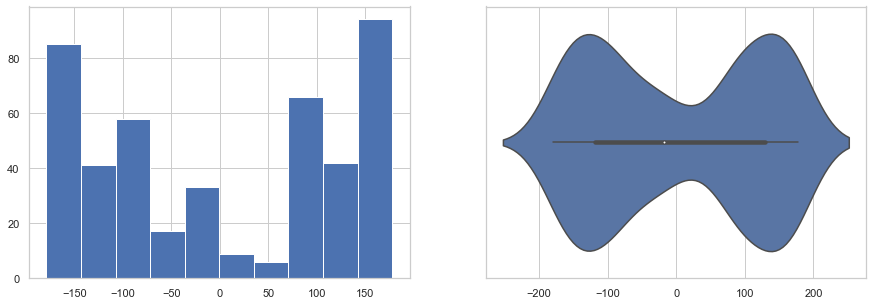

In [13]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_bf.hist()

plt.subplot(1, 2, 2)
values = col_13_bf.values
ax = sns.violinplot(x=values)

In [14]:
col_13_ff = col_13.fillna(method='ffill')
print("Mean: ", col_13_ff.mean())
print("Median: ", col_13_ff.median())
print("Std Dev: ", col_13_ff.std())

Mean:  -12.706666666666667
Median:  -39.0
Std Dev:  123.64686118387158


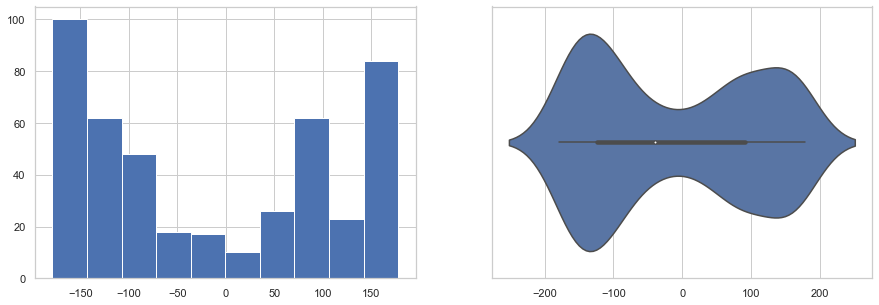

In [15]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_ff.hist()

plt.subplot(1, 2, 2)
values = col_13_ff.values
ax = sns.violinplot(x=values)

Looking at the three sets of charts above, we can see that the choice of fill has a very large effect on how the distributions look. The standard deviations don't change much between the baseline and the imputation methods, but the mean and medians shift quite a bit!
<br><br>
Next we will look at imputing the mean and median for the missing values and see how this changes the distributions. These methods simply replace all NaN's with the mean or median of the column. Before reading on, what will happen to the mean and median if we replace all of the NaN's with the mean? with the median?

In [16]:
col_13_mean = col_13.fillna(value=col_13.mean())
print("Mean: ", col_13_mean.mean())
print("Median: ", col_13_mean.median())
print("Std Dev: ", col_13_mean.std())

Mean:  -13.592105263157897
Median:  -13.592105263157896
Std Dev:  51.87983632814333


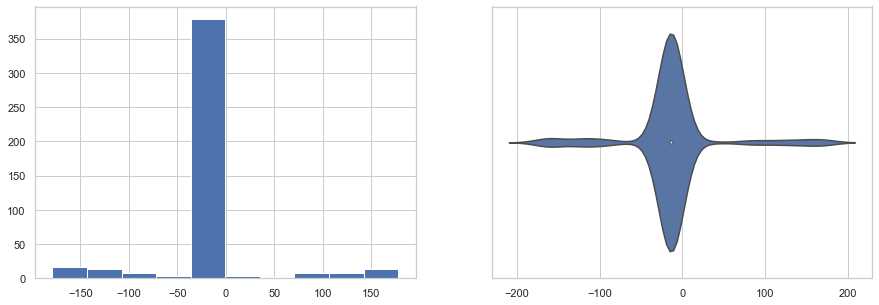

In [17]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_mean.hist()

plt.subplot(1, 2, 2)
values = col_13_mean.values
ax = sns.violinplot(x=values)

In [18]:
col_13_median = col_13.fillna(value=col_13.median())
print("Mean: ", col_13_median.mean())
print("Median: ", col_13_median.median())
print("Std Dev: ", col_13_median.std())

Mean:  -44.29424778761062
Median:  -50.5
Std Dev:  53.688637226904405


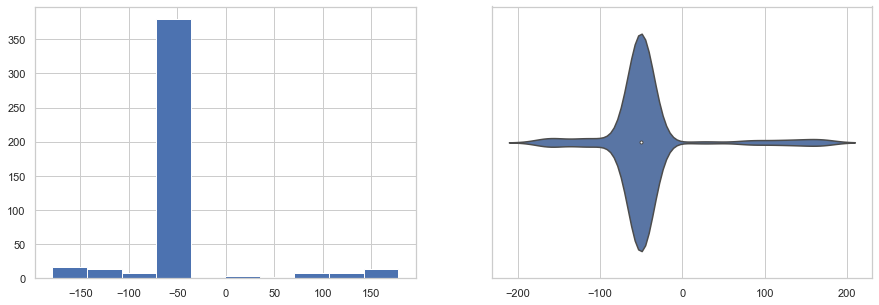

In [19]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_median.hist()

plt.subplot(1, 2, 2)
values = col_13_median.values
ax = sns.violinplot(x=values)

The changes are markedly different from the fills we looked at above! When we imputed the mean, the mean didn't change compared to the baseline and when we imputed the median, the median didn't change compared to the baseline. However, the standard deviation decreased significantly. Let's take a moment to ponder why. Every entry in the column is being replaced with the exact same value, thus there is less variance in the values in the dataset which means the standard deviation is lower.
<br><br>
Next we will look at some more advanced methods of imputing values, technically called interpolating. These will also use methods native to pandas DataFrames, namely linear, quadratic (since the distribution of the baseline shows a quadratic like shape this should be a good choice, right?), and akima.

In [20]:
col_13_lin = col_13.interpolate(method='linear')
print("Mean: ", col_13_lin.mean())
print("Median: ", col_13_lin.median())
print("Std Dev: ", col_13_lin.std())

Mean:  -4.315555555555554
Median:  -7.100000000000001
Std Dev:  92.27125933737385


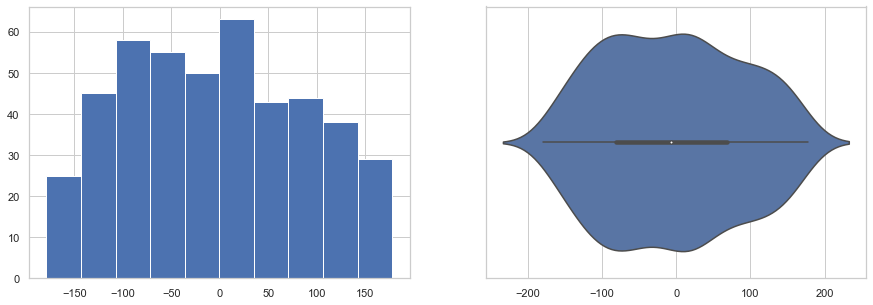

In [21]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_lin.hist()

plt.subplot(1, 2, 2)
values = col_13_lin.values
ax = sns.violinplot(x=values)

In [22]:
col_13_quad = col_13.interpolate(method='quadratic')
print("Mean: ", col_13_quad.mean())
print("Median: ", col_13_quad.median())
print("Std Dev: ", col_13_quad.std())

Mean:  27.416908671499222
Median:  17.494543500724166
Std Dev:  187.26920338864994


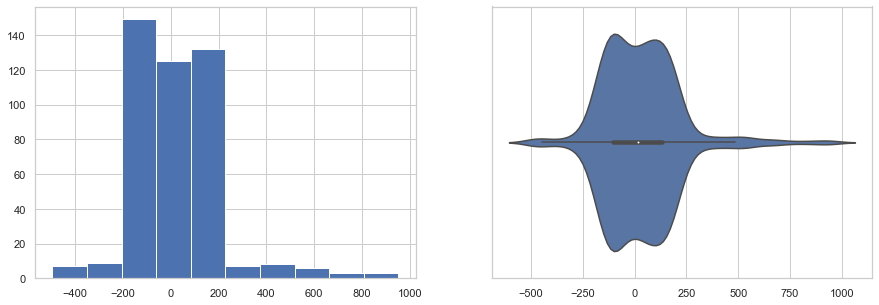

In [23]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_quad.hist()

plt.subplot(1, 2, 2)
values = col_13_quad.values
ax = sns.violinplot(x=values)

In [24]:
col_13_akima = col_13.interpolate(method='akima')
print("Mean: ", col_13_akima.mean())
print("Median: ", col_13_akima.median())
print("Std Dev: ", col_13_akima.std())

Mean:  -3.323043554043639
Median:  -8.934712653650834
Std Dev:  104.99688534313094


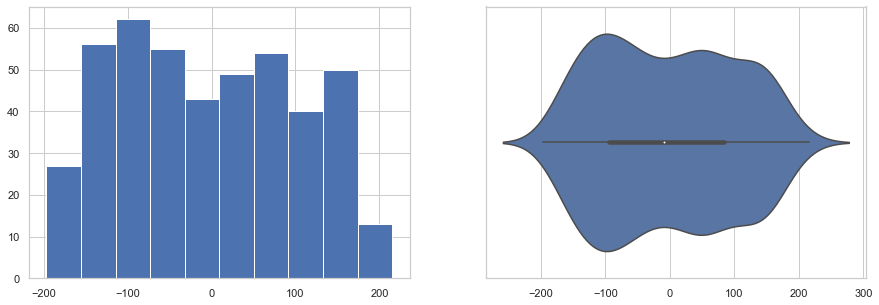

In [25]:
f = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
col_13_akima.hist()

plt.subplot(1, 2, 2)
values = col_13_akima.values
ax = sns.violinplot(x=values)

So these results are very different from the results we saw for the fill and mean/median imputation methods! Again we see a lot of difference between the central tendancies compared to the baseline AND a lot of difference between the standard deviations compared to the baseline. The problem with using these interpolation methods in this context is that they are dependent on the index of the Series or DataFrame and because this dataset is not ordered, this is an issue. Now, this isn't to say that interpolation shouldn't be used! But it should be used with the proper dataset, as it is a powerful tool.
<br><br>
It's possible to do regression, or classification, to fit a model to other variables in the dataset in order to try and predict the missing values. The model of choice can be anything from a simple linear regression model to a neural network if you so desired! Because there are only 76 variables, a linear regression model might work, but a more data hungry model will likely be unable to fit the distribution well enough to be useful.

In [29]:
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Table(
        header=dict(values=['Imputation Type', 'Mean', 'Median', 'Std Dev']),
        cells=dict(values=[['Baseline', 'Back Fill', 'Forward Fill', 'Mean', 'Median', 
                            'Linear', 'Quadratic', 'Akima'],
                           [col_13.mean().round(3), col_13_bf.mean().round(3), col_13_ff.mean().round(3), 
                            col_13_mean.mean().round(3), col_13_median.mean().round(3), 
                            col_13_lin.mean().round(3), col_13_quad.mean().round(3), 
                            col_13_akima.mean().round(3)],
                           [col_13.median().round(3), col_13_bf.median().round(3), col_13_ff.median().round(3), 
                            col_13_mean.median().round(3), col_13_median.median().round(3), 
                            col_13_lin.median().round(3), col_13_quad.median().round(3), 
                            col_13_akima.median().round(3)],
                          [col_13.std().round(3), col_13_bf.std().round(3), col_13_ff.std().round(3), 
                           col_13_mean.std().round(3), col_13_median.std().round(3), col_13_lin.std().round(3), 
                           col_13_quad.std().round(3), col_13_akima.std().round(3)]
                          ]
                  )
    )
)
                
fig.show()

## Cleaning, Analysis, and Visualization

After the brief aside into imputation and inteprolation, we will now actually work on cleaning the data, doing some exploratory analysis, and work on visualizing the data. I will look at each of the columns that have NaN's present and decide how to treat them. In the case of Column 13, it will be dropped since over 83% of the values are NaN. For Column 15, heart rate, we will drop the one row that has NaN as the patient's heart rate, intuitively, seems like something important when considering arrhythmias. For Columns 11, 12, and 14, we will use mean imputation to replace the NaN's.

In [46]:
data[10] = data[10].fillna(value=data[10].mean()) #impute mean for NaNs
data[11] = data[11].fillna(value=data[11].mean()) #impute mean for NaNs
data = data.drop(columns=12) #drop the column that is missing 83% of values
data[13] = data[13].fillna(value=data[13].mean()) #impute mean for NaNs
data = data.dropna()

In [70]:
data.shape

(451, 279)

In [49]:
data_len = len(data)

nan_count = 0

for col in data.columns:
    nan_count = data[col].isnull().sum()
    if nan_count != 0:
        nan_count += 1
        
print("Number of columns with NaNs: ", nan_count)

Number of columns with NaNs:  0


Excellent! The DataFrame now has no NaN values and the proper number of rows and columns. We now have a clean dataset to work with. This was a fairly straightforward cleaning process to work with, not all datasets will be so simple and this isn't the only way this dataset could have been cleaned!

In [99]:
for col in data.columns:
    print("Col: {}\nMean: {:.3}\tStdDev: {:.3f}\tMin: {}\tMax: {}\nQuartiles: \n{}".format(
        col, data[col].mean(), data[col].std(), data[col].min(), data[col].max(),
        data[col].quantile([0.25, 0.5, 0.75])))

Col: 0
Mean: 46.4	StdDev: 16.430	Min: 0	Max: 83
Quartiles: 
0.25    36.0
0.50    47.0
0.75    58.0
Name: 0, dtype: float64
Col: 1
Mean: 0.552	StdDev: 0.498	Min: 0	Max: 1
Quartiles: 
0.25    0.0
0.50    1.0
0.75    1.0
Name: 1, dtype: float64
Col: 2
Mean: 1.66e+02	StdDev: 37.195	Min: 105	Max: 780
Quartiles: 
0.25    160.0
0.50    164.0
0.75    170.0
Name: 2, dtype: float64
Col: 3
Mean: 68.1	StdDev: 16.600	Min: 6	Max: 176
Quartiles: 
0.25    59.0
0.50    68.0
0.75    78.5
Name: 3, dtype: float64
Col: 4
Mean: 88.9	StdDev: 15.381	Min: 55	Max: 188
Quartiles: 
0.25    80.0
0.50    86.0
0.75    94.0
Name: 4, dtype: float64
Col: 5
Mean: 1.55e+02	StdDev: 44.876	Min: 0	Max: 524
Quartiles: 
0.25    142.0
0.50    157.0
0.75    174.5
Name: 5, dtype: float64
Col: 6
Mean: 3.67e+02	StdDev: 33.421	Min: 232	Max: 509
Quartiles: 
0.25    350.0
0.50    367.0
0.75    384.0
Name: 6, dtype: float64
Col: 7
Mean: 1.7e+02	StdDev: 35.671	Min: 108	Max: 381
Quartiles: 
0.25    148.0
0.50    162.0
0.75    179.0
Name

Col: 82
Mean: 0.0244	StdDev: 0.154	Min: 0	Max: 1
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 82, dtype: float64
Col: 83
Mean: 0.0	StdDev: 0.000	Min: 0	Max: 0
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 83, dtype: float64
Col: 84
Mean: 0.00222	StdDev: 0.047	Min: 0	Max: 1
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 84, dtype: float64
Col: 85
Mean: 0.00222	StdDev: 0.047	Min: 0	Max: 1
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 85, dtype: float64
Col: 86
Mean: 0.00222	StdDev: 0.047	Min: 0	Max: 1
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 86, dtype: float64
Col: 87
Mean: 12.4	StdDev: 26.621	Min: 0	Max: 140
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 87, dtype: float64
Col: 88
Mean: 23.9	StdDev: 16.397	Min: 0	Max: 216
Quartiles: 
0.25    20.0
0.50    24.0
0.75    32.0
Name: 88, dtype: float64
Col: 89
Mean: 42.2	StdDev: 23.809	Min: 0	Max: 116
Quartiles: 
0.25    34.0
0.50    48.0
0.75    60.0
Name: 89, dtype: float64
Col: 90
Mean: 4

Col: 157
Mean: 0.0	StdDev: 0.000	Min: 0	Max: 0
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 157, dtype: float64
Col: 158
Mean: 0.0111	StdDev: 0.105	Min: 0	Max: 1
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 158, dtype: float64
Col: 159
Mean: -0.208	StdDev: 0.625	Min: -9.0	Max: 1.4
Quartiles: 
0.25   -0.4
0.50   -0.1
0.75    0.1
Name: 159, dtype: float64
Col: 160
Mean: -0.193	StdDev: 0.397	Min: -2.7	Max: 0.0
Quartiles: 
0.25   -0.4
0.50    0.0
0.75    0.0
Name: 160, dtype: float64
Col: 161
Mean: 6.01	StdDev: 2.806	Min: 0.0	Max: 19.9
Quartiles: 
0.25    4.0
0.50    5.7
0.75    7.6
Name: 161, dtype: float64
Col: 162
Mean: -1.02	StdDev: 1.484	Min: -13.8	Max: 0.0
Quartiles: 
0.25   -1.5
0.50   -0.6
0.75    0.0
Name: 162, dtype: float64
Col: 163
Mean: 0.00687	StdDev: 0.095	Min: 0.0	Max: 1.9
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 163, dtype: float64
Col: 164
Mean: 0.0	StdDev: 0.000	Min: 0.0	Max: 0.0
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 164, dt

Col: 233
Mean: 0.182	StdDev: 0.973	Min: 0.0	Max: 14.9
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 233, dtype: float64
Col: 234
Mean: -0.016	StdDev: 0.219	Min: -4.0	Max: 0.0
Quartiles: 
0.25    0.0
0.50    0.0
0.75    0.0
Name: 234, dtype: float64
Col: 235
Mean: 0.0031	StdDev: 0.492	Min: -2.3	Max: 3.3
Quartiles: 
0.25   -0.3
0.50    0.1
0.75    0.3
Name: 235, dtype: float64
Col: 236
Mean: 2.62	StdDev: 2.412	Min: -8.6	Max: 13.2
Quartiles: 
0.25    1.3
0.50    2.4
0.75    3.7
Name: 236, dtype: float64
Col: 237
Mean: -18.0	StdDev: 25.687	Min: -195.3	Max: 133.9
Quartiles: 
0.25   -25.25
0.50   -15.60
0.75    -5.90
Name: 237, dtype: float64
Col: 238
Mean: 10.2	StdDev: 26.686	Min: -95.1	Max: 123.6
Quartiles: 
0.25    -4.50
0.50     8.90
0.75    24.15
Name: 238, dtype: float64
Col: 239
Mean: 0.771	StdDev: 1.445	Min: -3.3	Max: 15.1
Quartiles: 
0.25    0.00
0.50    0.60
0.75    1.25
Name: 239, dtype: float64
Col: 240
Mean: -0.655	StdDev: 3.418	Min: -32.9	Max: 0.0
Quartiles: 
0.25    0.

Now, 279 variables is a lot of variables and its very likely that not all of them are particularly informative. Before doing more in-depth exploration we will use a common dimensionality reduction technique called Principal Component Analysis using the sci-kit learn package. PCA maps a dataset into a new space where the variable with the most variance, and thus most information, loosely speaking, is mapped to the first coordinate, the variable with the second most variance to the second coordinate, and so on. But first, let's look at the correlation matrix of our data.

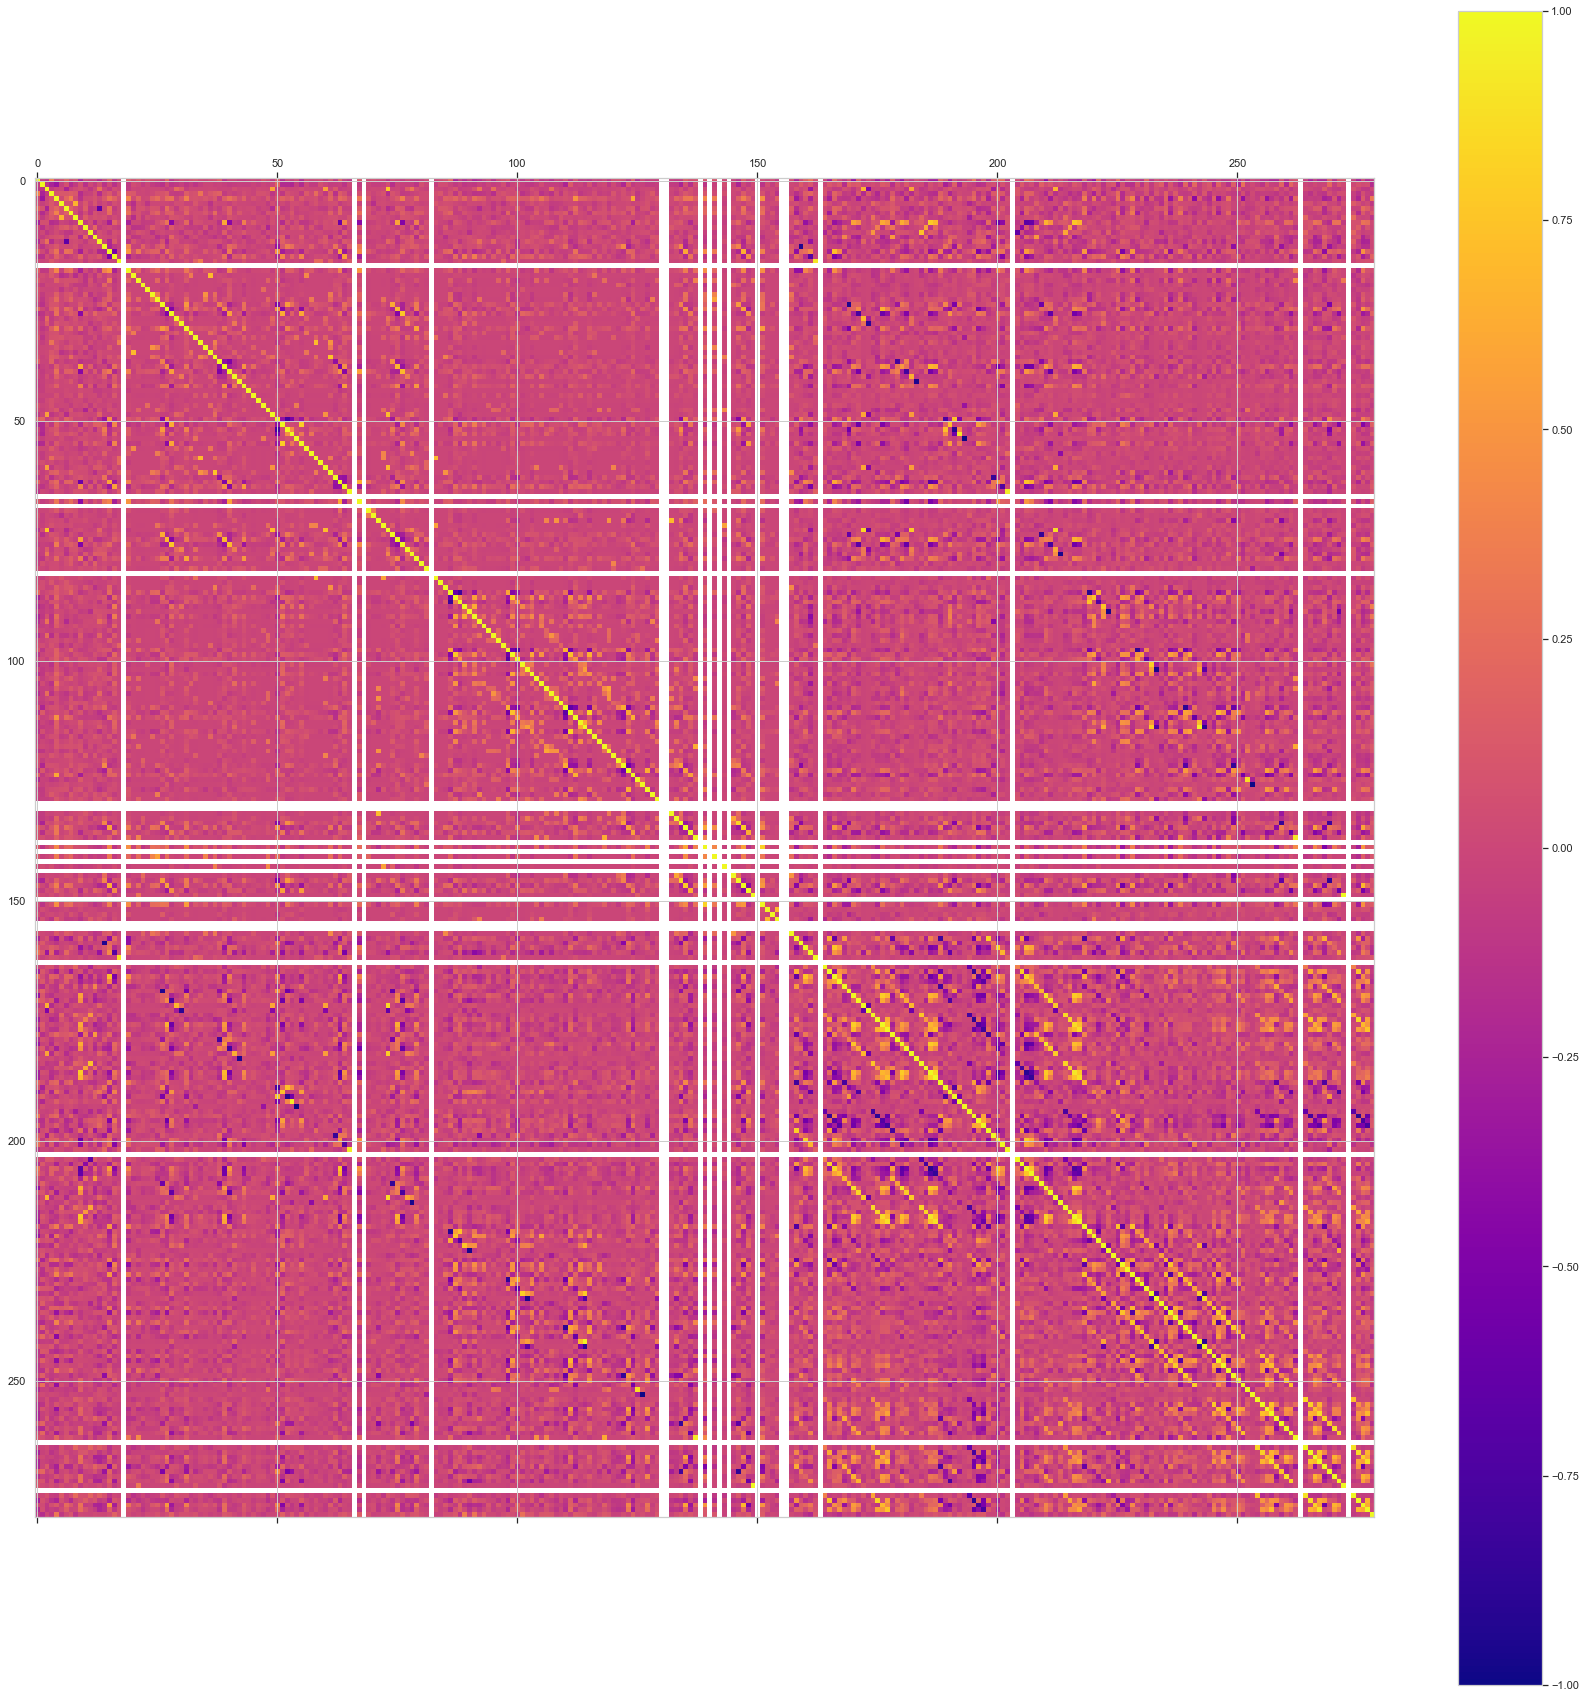

In [89]:
import matplotlib.cm as cm

f = plt.figure(figsize=(30,30))
plt.matshow(data.corr(), fignum=f.number, cmap=cm.plasma)
cb = plt.colorbar()
plt.show()

From the above correlation map, we see that some of the variables are very correlated, either positively or negatively, and some have very little correlation at all. Typically, variables that are highly correlated are less informative and are somewhat redundant. For example, if age and heart rate are highly correlated then if we see a change in the age we can probably guess how the heart rate will change, to some degree. Thus, there is minimal information being added by having both variables. While this process could be done manually, PCA is a much better and more efficient method.

In [58]:
from sklearn.decomposition import PCA

REDUCT_FACTOR = 0.2 #factor by which to reduce the number of variabls, in this case 20%
                    #of the variables will be kept

reduction = int(round(len(data.columns) * REDUCT_FACTOR, ndigits=0))

pca = PCA(n_components=reduction)

data_redox = pca.fit_transform(data) #returns a numpy array
data_redox = pd.DataFrame(data_redox) #convert back to DataFrame

In [63]:
data_redox.describe()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
count,451.000000,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,...,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,0.000000,-4.285313e-15,6.490989e-15,-6.049854e-15,3.277004e-15,3.466062e-15,-6.806086e-15,5.104564e-15,9.074781e-15,7.814395e-15,...,1.701521e-15,-9.452897e-17,-1.417935e-15,-3.056437e-15,-1.323406e-15,7.026653e-15,1.512463e-15,7.247221e-16,2.536527e-15,-5.356641e-16
std,79.670285,6.618639e+01,6.170046e+01,6.131378e+01,4.828360e+01,4.698290e+01,4.521785e+01,4.282711e+01,3.876027e+01,3.604917e+01,...,8.720201e+00,8.401612e+00,8.042395e+00,7.843076e+00,7.518942e+00,7.409857e+00,7.313105e+00,7.184936e+00,6.915095e+00,6.733405e+00
min,-181.915675,-2.715589e+02,-1.910876e+02,-2.723180e+02,-1.955093e+02,-1.885225e+02,-1.388945e+02,-1.443007e+02,-5.985715e+01,-1.662594e+02,...,-2.726654e+01,-2.811319e+01,-2.338015e+01,-2.791277e+01,-3.112662e+01,-2.363560e+01,-2.614250e+01,-2.149773e+01,-2.629487e+01,-2.206217e+01
25%,-54.257026,-3.822199e+01,-3.394589e+01,-3.381082e+01,-2.039541e+01,-2.008627e+01,-2.789304e+01,-2.859692e+01,-1.806799e+01,-1.819774e+01,...,-5.182968e+00,-5.178641e+00,-4.904682e+00,-4.287094e+00,-4.350652e+00,-4.993632e+00,-4.571883e+00,-4.225955e+00,-4.005882e+00,-4.022176e+00
50%,-10.283559,-5.881715e+00,8.875227e-01,-2.861933e-01,-1.796399e+00,1.034744e+00,-2.978094e+00,-3.174504e+00,-3.822714e+00,2.817205e+00,...,2.538149e-03,-2.949258e-02,-4.394129e-01,-1.652150e-01,-3.700236e-02,1.506242e-01,-2.635888e-02,1.317730e-01,1.381478e-01,-2.682307e-01
75%,43.474507,2.724861e+01,3.228734e+01,2.715721e+01,2.260098e+01,1.915471e+01,2.706187e+01,2.315000e+01,1.212932e+01,1.983448e+01,...,4.782673e+00,4.671013e+00,5.193031e+00,4.523572e+00,4.678602e+00,4.396226e+00,4.258344e+00,4.433816e+00,4.294651e+00,3.564539e+00
max,331.531683,3.883635e+02,2.249976e+02,3.264711e+02,3.276059e+02,2.638358e+02,2.144467e+02,2.520892e+02,4.854167e+02,2.118606e+02,...,3.797274e+01,6.348099e+01,3.460137e+01,3.176351e+01,3.289755e+01,4.452969e+01,3.364882e+01,2.922674e+01,2.676634e+01,2.647054e+01


In [65]:
data_redox.shape

(451, 56)

The number of rows has been preserved, but the number of columns has reduced to 56. We notice that the columns are now ordered by standard deviation, the square root of the variance, and the columns are all zero meaned, or within an arbitrary distance from zero. This can help with fitting models in the future! 

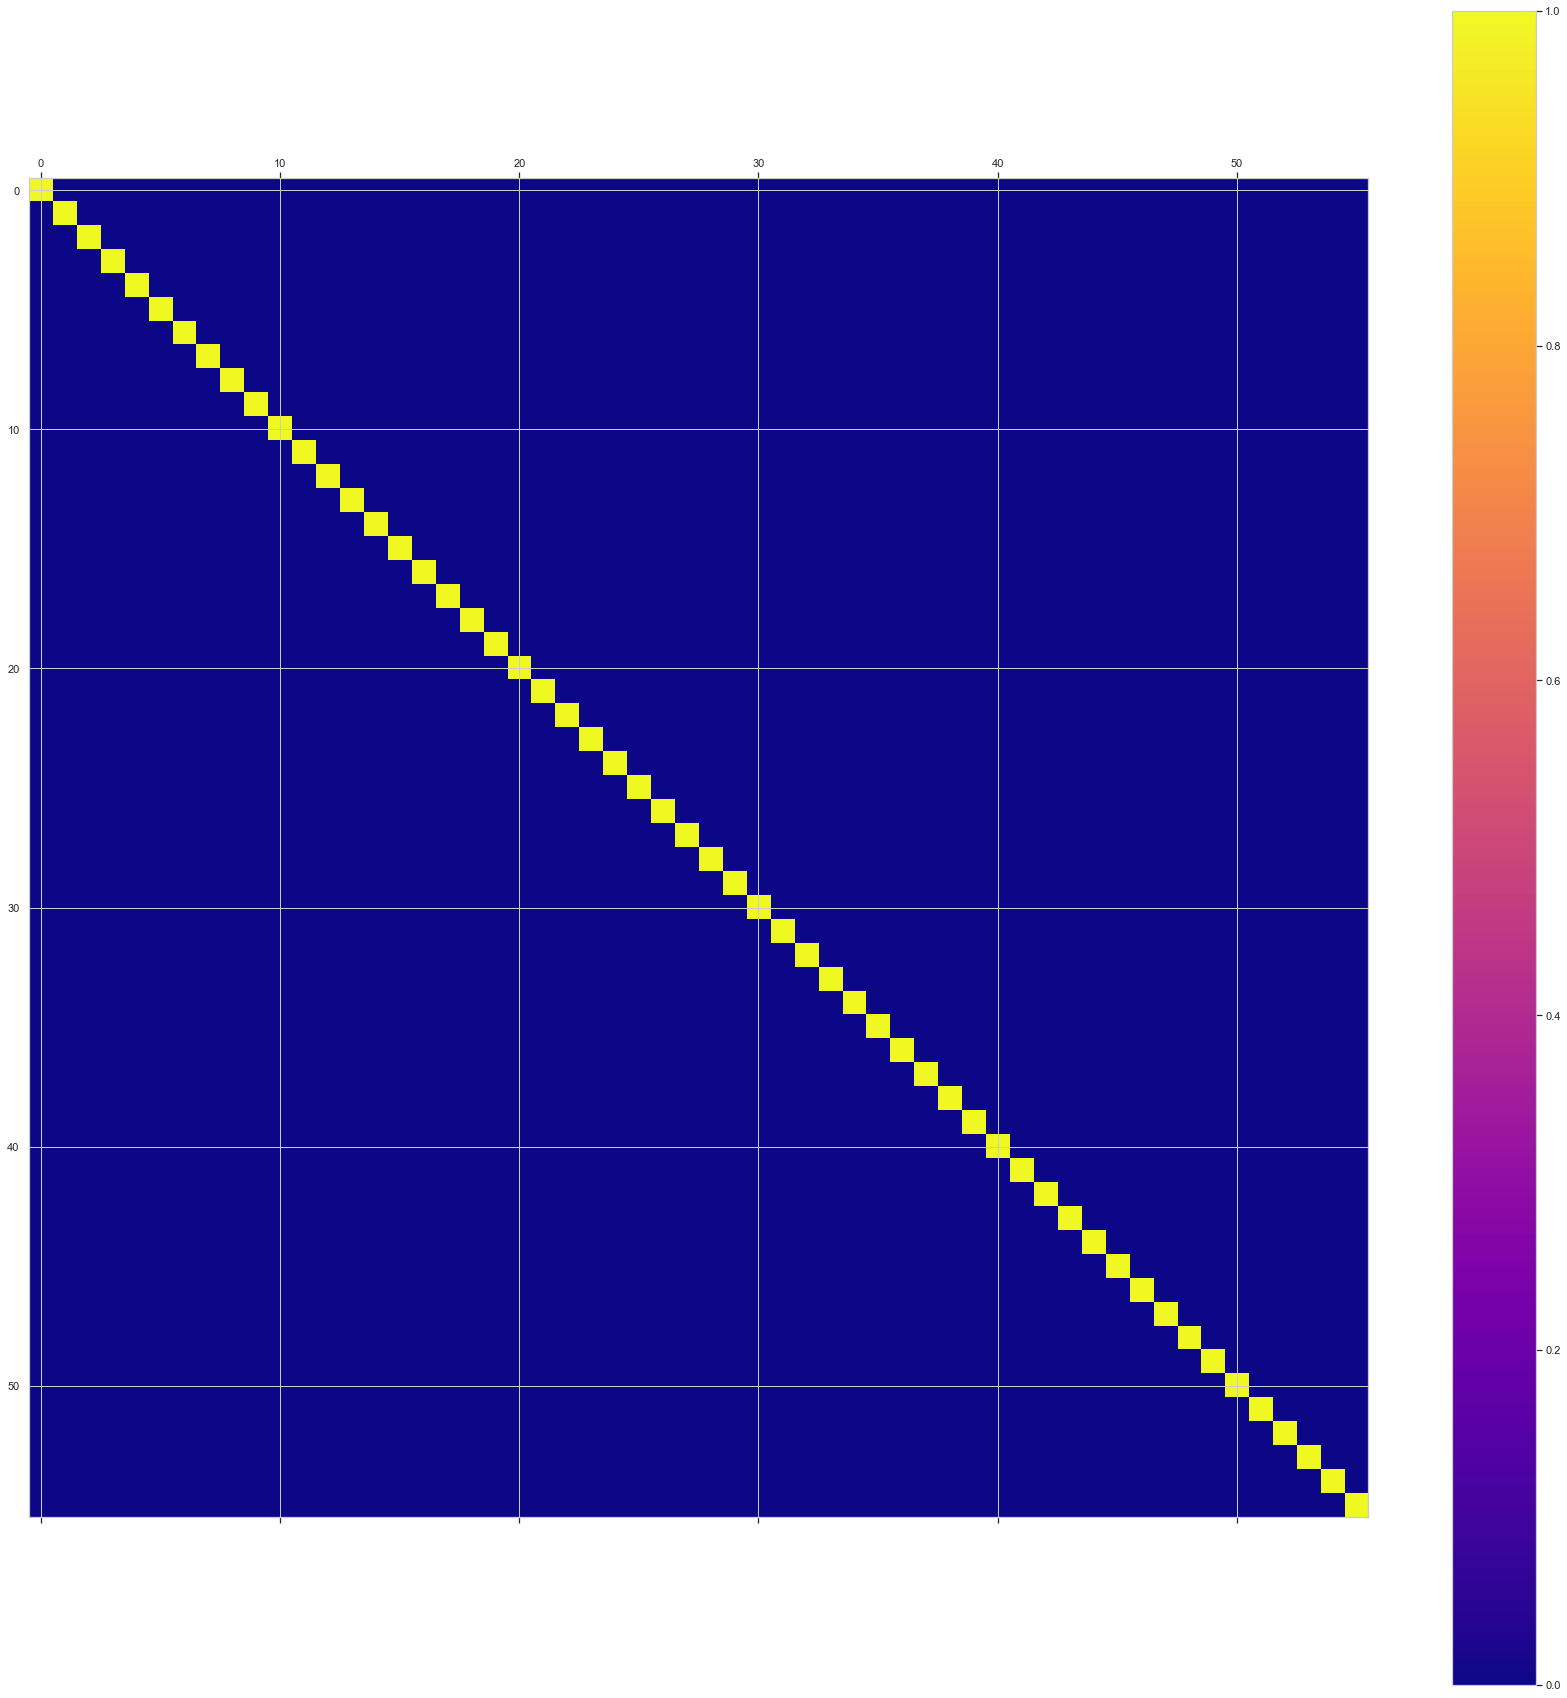

In [90]:
f = plt.figure(figsize=(30,30))
plt.matshow(data_redox.corr(), fignum=f.number, cmap=cm.plasma)
cb = plt.colorbar()
plt.show()

To better understand the effects of the PCA process, we will examine the correlation matrix of the transformed dataset. We see that the correlation anywhere off the diagonal is very low, which is desireable!